###### Import Libraries

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder

###### Reading data

In [35]:
df = pd.read_csv('../Data/data_regression.csv')
df.head()

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls  churn  
0                    4.0                       1    0.0  
1                    3.0                       2    0.0  
2                    4.0                       5    1.0  
3                    3.0                       3    0.0  
4                    3.0                       1    0.0

#### Inspecting and cleaning up the frame

The variables: 
year                        int64
customer_id                 int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object
Total samples with missing values per variables:
year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0


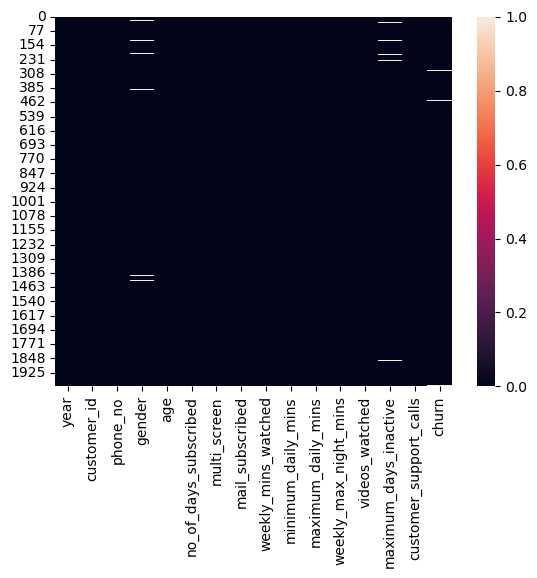

In [36]:
def inspection(dataFrame):
    print('The variables: ')
    print(dataFrame.dtypes)
    
    print('Total samples with missing values per variables:')
    print(df.isnull().sum())
    
    print('map of missing values')
    print(sns.heatmap(dataFrame.isnull()))
    
inspection(df)

In [37]:
df = df.dropna()

###### Encoding categorical variables

In [38]:
df.head(5)

df.multi_screen.unique()

array(['no', 'yes'], dtype=object)

In [39]:
# function for encoding categorical variables
def encode_categories(df,variables):
    ord_enc = OrdinalEncoder() 
    for v in variables:
        name = v+'_code' # add _code for encoded variables
        df[name] = ord_enc.fit_transform(df[[v]])
        print('The encoded values for '+ v + ' are:')
        print(df[name].unique())

In [40]:
# check for the encoded variables
encode_categories(df,['gender','multi_screen','mail_subscribed'])

The encoded values for gender are:
[0. 1.]
The encoded values for multi_screen are:
[0. 1.]
The encoded values for mail_subscribed are:
[0. 1.]


###### Visualization

In [45]:
def plot_scatterplots (df,cols_to_exclude,class_col):
    cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=df[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    for col in X.columns.difference([class_col]):
        g = sns.FacetGrid(df)
        g.map(sns.scatterplot, col, class_col)

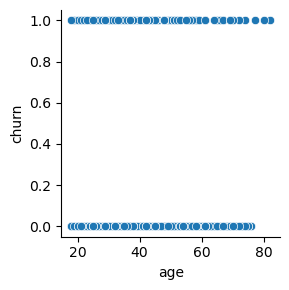

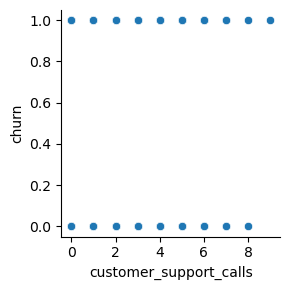

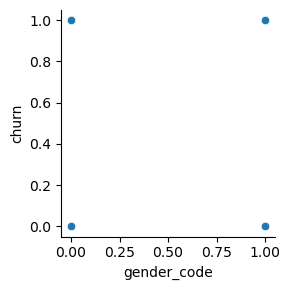

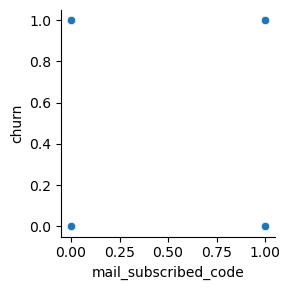

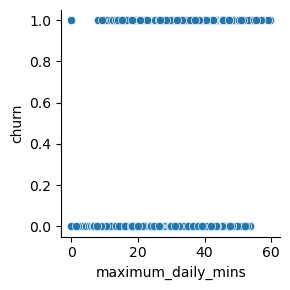

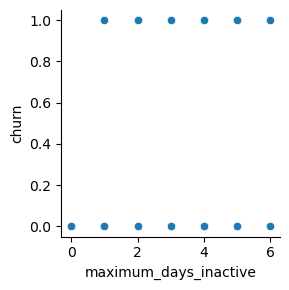

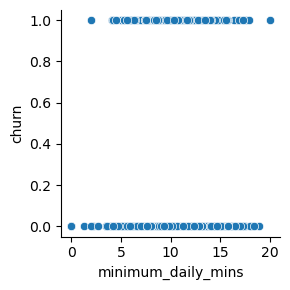

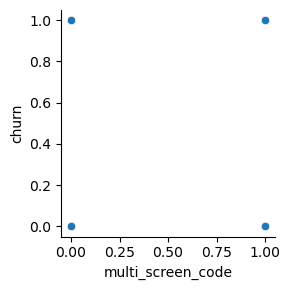

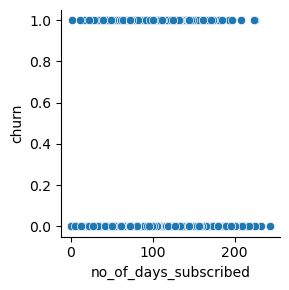

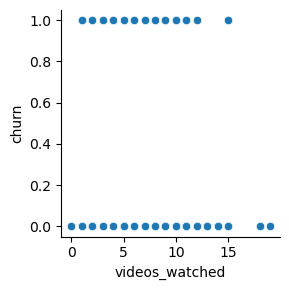

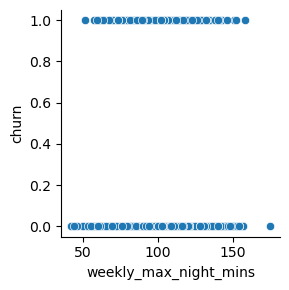

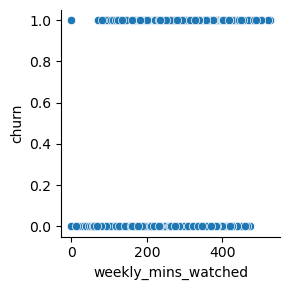

In [46]:
# plot 
plot_scatterplots (df,['customer_id','phone_no', 'year'],'churn')

In [47]:
def full_diagnostic(df,class_col,cols_to_exclude):
    cols=df.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
    X=df[cols] #creating a dataframe only with the numerical columns
    X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
    X = X[X.columns.difference([class_col])]
    sns.pairplot(df,hue = class_col)

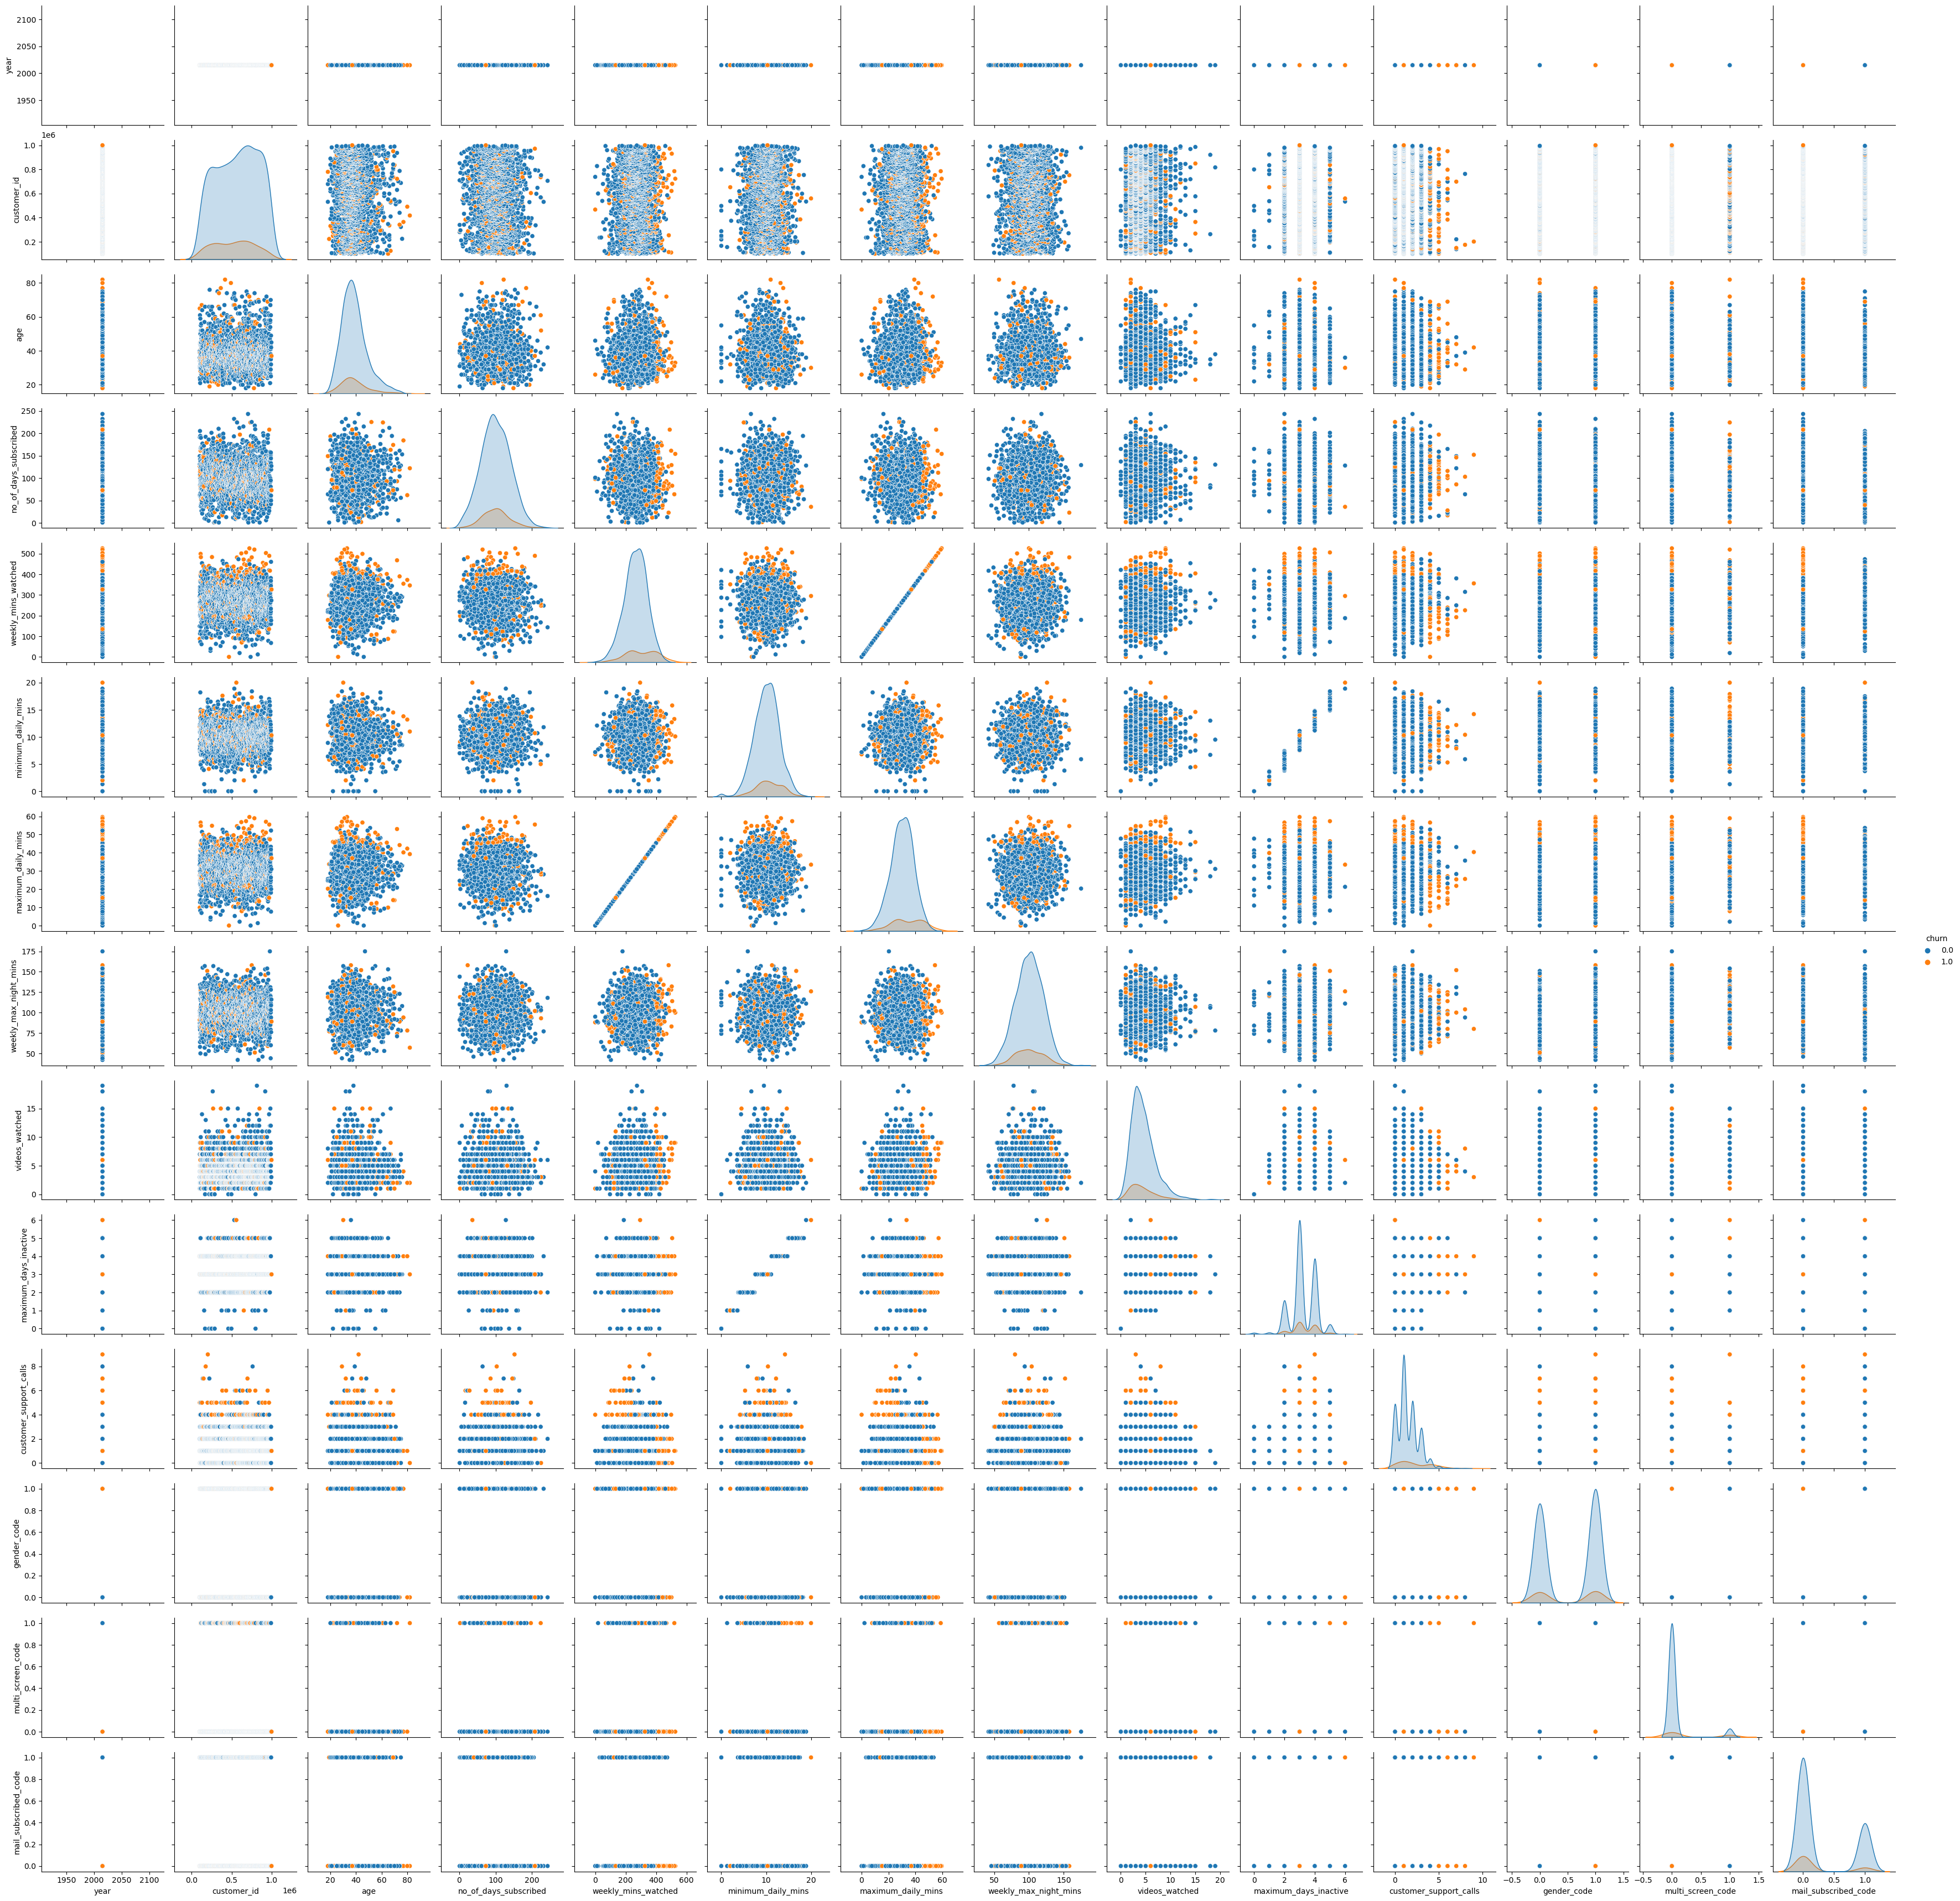

In [48]:
full_diagnostic(df,class_col = 'churn',cols_to_exclude=['customer_id','phone_no', 'year'])

In [49]:
# function for creating plots for selective columns only
def selected_diagnotic(df,class_col,cols_to_eval):
  cols_to_eval.append(class_col) 
  X = df[cols_to_eval] # only selective columns
  sns.pairplot(X,hue = class_col) # plot

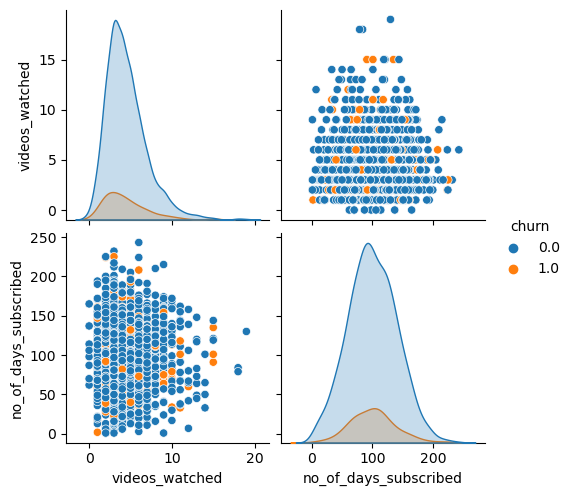

In [50]:
selected_diagnotic(df,class_col = 'churn',cols_to_eval = ['videos_watched','no_of_days_subscribed'])

In [51]:
df.to_csv('../Data/Processed.csv', index = False)